In [1]:
import networkx as nx
import numpy as np
import pandas as pd

# for the explode statement; convert string to list
from ast import literal_eval

from IPython.display import SVG 
from sknetwork.visualization import svg_graph 
from sknetwork.data import Bunch 
from sknetwork.ranking import PageRank 

In [2]:
def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5): 

    adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr') 

    names = np.array(list(G.nodes())) 

    graph = Bunch() 
    graph.adjacency = adjacency 
    graph.names = np.array(names) 

    pagerank = PageRank() 

    scores = pagerank.fit_transform(adjacency) 

    if show_names: 
        
        image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width) 

    else: 

        image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width) 

    return SVG(image) 

In [4]:
data = r'data/arxiv_osint.csv'

df = pd.read_csv(data)
df['authors'] = df['authors'].apply(literal_eval)

df = df[['authors', 'title']]
df = df.explode('authors')
df.reset_index(drop=True, inplace=True)

# fix the & so that scikit-network stops crashing
df['authors'] = df['authors'].str.replace('&', 'and')
df['title'] = df['title'].str.replace('&', 'and')

df.head()

,authors,title
0,Sohail Ahmed Khan,Online Multimedia Verification with Computatio...
1,Jan Gunnar Furuly,Online Multimedia Verification with Computatio...
2,Henrik Brattli Vold,Online Multimedia Verification with Computatio...
3,Rano Tahseen,Online Multimedia Verification with Computatio...
4,Duc-Tien Dang-Nguyen,Online Multimedia Verification with Computatio...


In [5]:
from networkx.algorithms import bipartite

B = nx.from_pandas_edgelist(df, source='authors', target='title')
G = bipartite.projected_graph(B, df['authors'])

In [6]:
print(nx.info(G))

Graph with 66 nodes and 132 edges


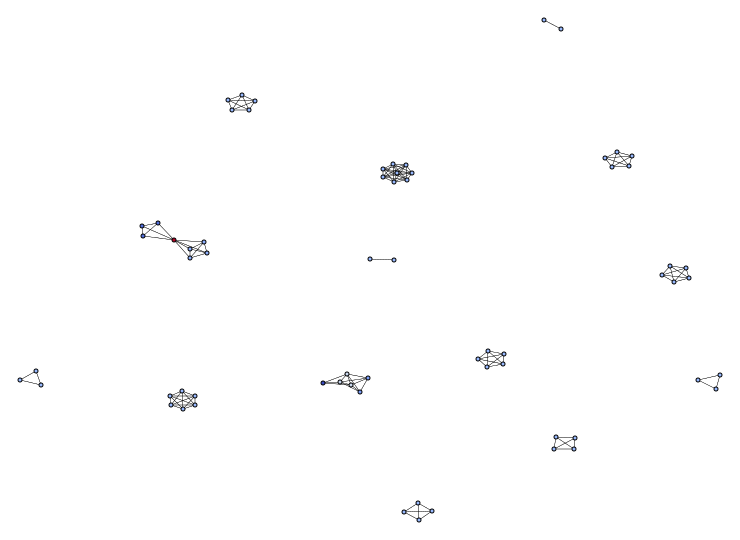

In [7]:
# this is artificial life without labels; it runs fast because this is a small network

draw_graph(G, node_size=2, show_names=False, edge_width=0.3)

In [8]:
# this is the core of the network science network with labels; the largest cluster in the bipartite projection

#draw_graph(nx.k_core(G, 10), node_size=2, font_size=12, show_names=True, edge_width=0.1)

In [9]:
# nodes = list(nx.k_core(G, 10).nodes)
# df[df['authors'].isin(nodes)]['title'].value_counts()[0:20]

# Egocentric Network Analysis

As the above visualization shows, this is a complex network. For knowledge discovery, we should use Egocentric Network Analysis to "zoom in" on nodes of interest. Any node can be looked at, but I am going to programmatically do this, in this notebook, showing only the top twenty nodes, according to page rank.

# PageRank - Identify Nodes of Interest

In [10]:
page_rank = nx.pagerank(G)

pr_df = pd.DataFrame().from_dict(page_rank, orient='index')
pr_df.columns = ['page_rank']
pr_df.sort_values('page_rank', ascending=False, inplace=True)
pr_df.head(10)

,page_rank
Murat Ozer,0.025282
Anupam Joshi,0.017245
Sudip Mittal,0.017245
Priyanka Ranade,0.017245
Anastasia N. Graivoronskaya,0.015152
Aleksandr G. Dodonov,0.015152
Dmitry V. Lande,0.015152
Vitaliy V. Tsyganok,0.015152
Oleh V. Andriichuk,0.015152
Sergii V. Kadenko,0.015152


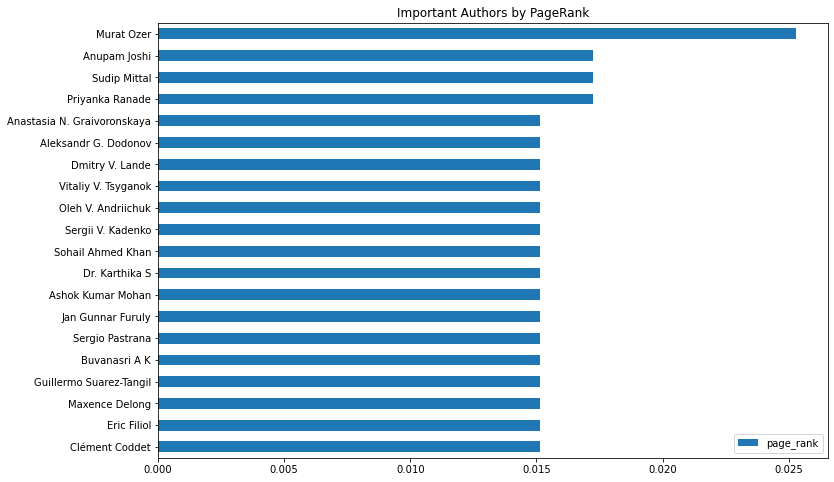

In [11]:
title = 'Important Authors by PageRank'

pr_df.head(20).plot.barh(figsize=(12,8), title=title).invert_yaxis()

# Egocentric Network Analysis
Next, let's look at the Ego Graphs for each of the top ten characters found by PageRank. Before visualizing and inspecting the Ego Graphs, let's create a Python list so that we can more easily look through them without explicitely typing their names.

In [12]:
top_nodes = pr_df.head(20).index.values

In [13]:
top_nodes[0]

'Murat Ozer'

Now we are all set to start looking through them, in order of importance.

## Top Node Ego Networks
Unlike last time, I am not going to drop the center node or write about findings. This is purely discovery. Remember two things:
- The center node is known as the 'ego' node. It is the node being looked up.
- The other nodes are known as 'alter' nodes. They are connected to the ego node, and sometimes with each other.

Pay close attention to the alter nodes that link to other alter nodes. These are interesting relationships, and you can see subcommunities in the ego network. Think about what you are seeing. What does this tell you?

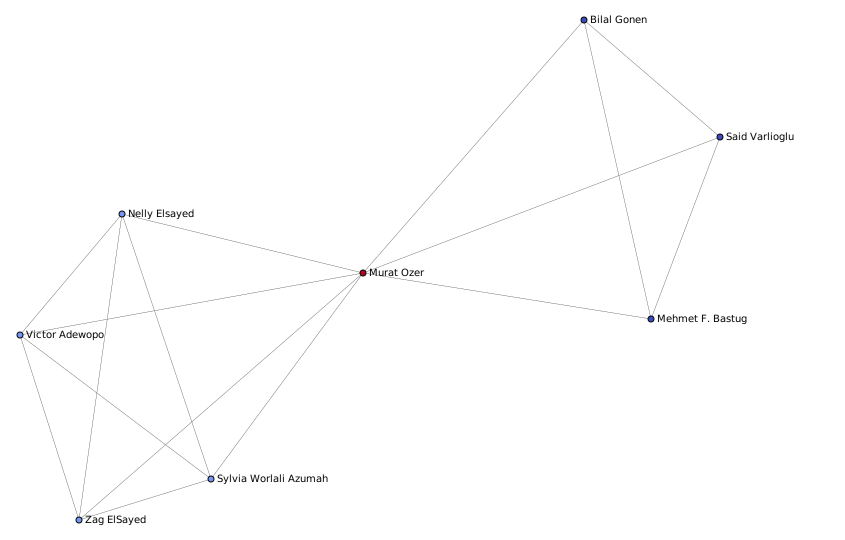

In [14]:
ego = top_nodes[0]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

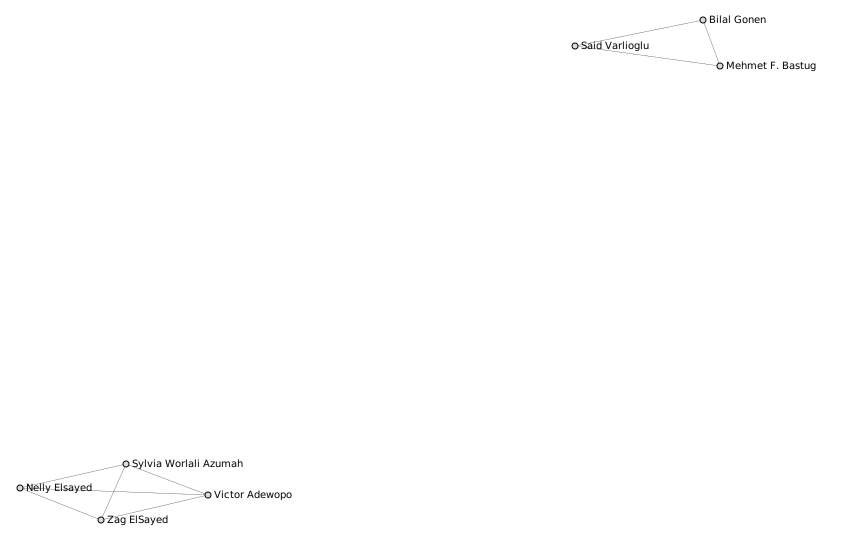

In [15]:
ego = top_nodes[0]

G_ego = nx.ego_graph(G, ego, center=False)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

In [16]:
# you can look at what articles the author was part of this way, going from networks to NLP

sorted(df[df['authors']==ego]['title'])

['A Secure Open-Source Intelligence Framework For Cyberbullying Investigation',
 'Is Cryptojacking Dead after Coinhive Shutdown?']

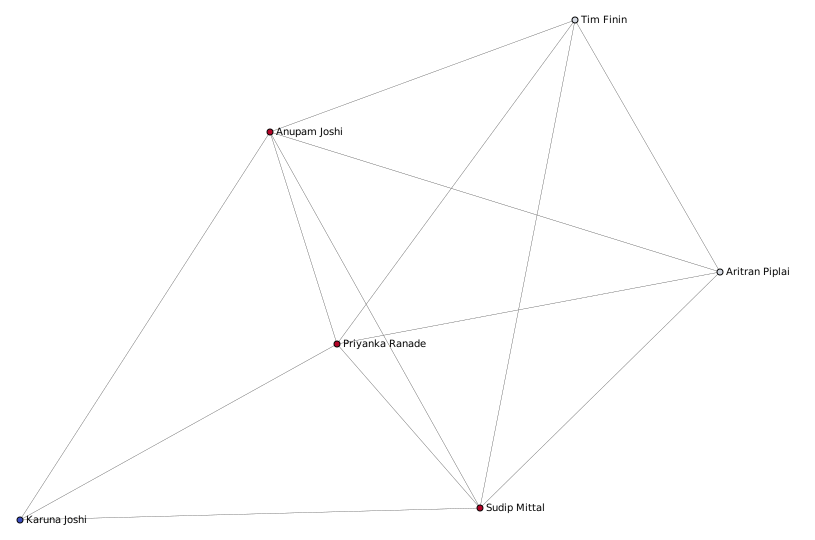

In [17]:
ego = top_nodes[1]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

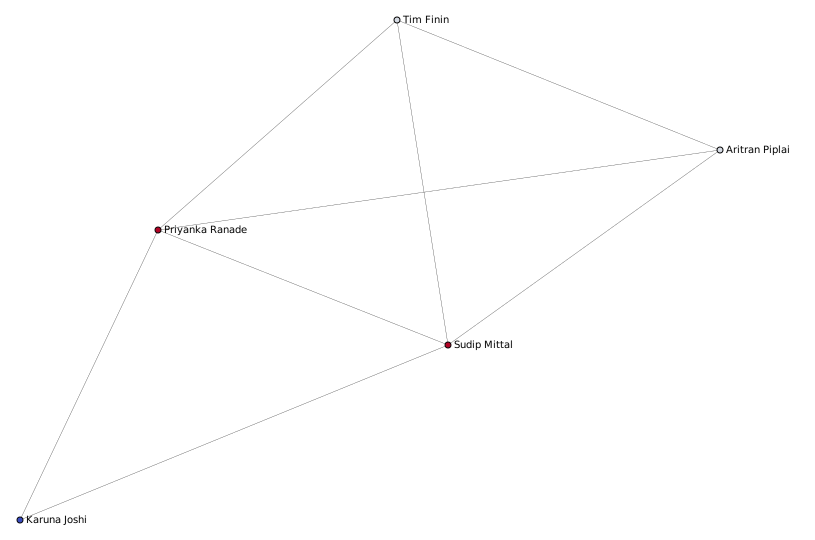

In [18]:
ego = top_nodes[1]

G_ego = nx.ego_graph(G, ego, center=False)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

In [19]:
# you can look at what articles the author was part of this way, going from networks to NLP

sorted(df[df['authors']==ego]['title'])

['Generating Fake Cyber Threat Intelligence Using Transformer-Based Models',
 'Using Deep Neural Networks to Translate Multi-lingual Threat Intelligence']

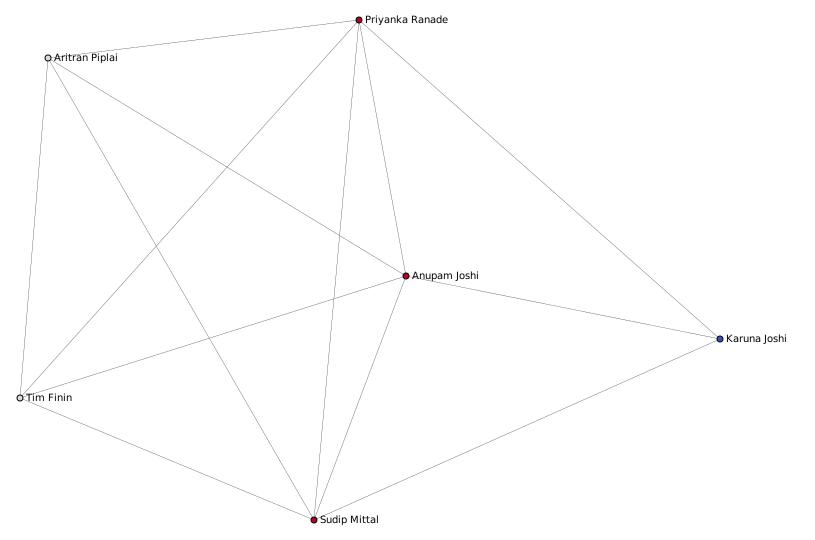

In [20]:
ego = top_nodes[2]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

In [21]:
# you can look at what articles the author was part of this way, going from networks to NLP

sorted(df[df['authors']==ego]['title'])

['Generating Fake Cyber Threat Intelligence Using Transformer-Based Models',
 'Using Deep Neural Networks to Translate Multi-lingual Threat Intelligence']

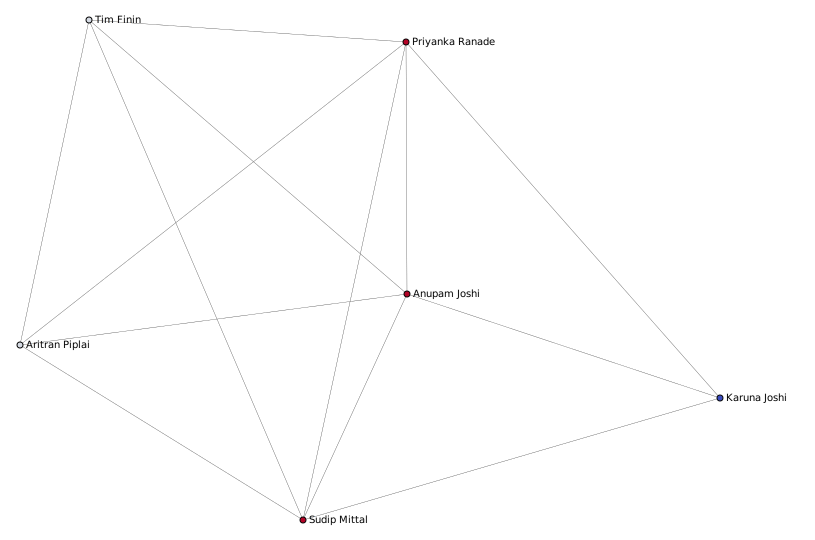

In [22]:
ego = top_nodes[3]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

In [23]:
# you can look at what articles the author was part of this way, going from networks to NLP

sorted(df[df['authors']==ego]['title'])

['Generating Fake Cyber Threat Intelligence Using Transformer-Based Models',
 'Using Deep Neural Networks to Translate Multi-lingual Threat Intelligence']

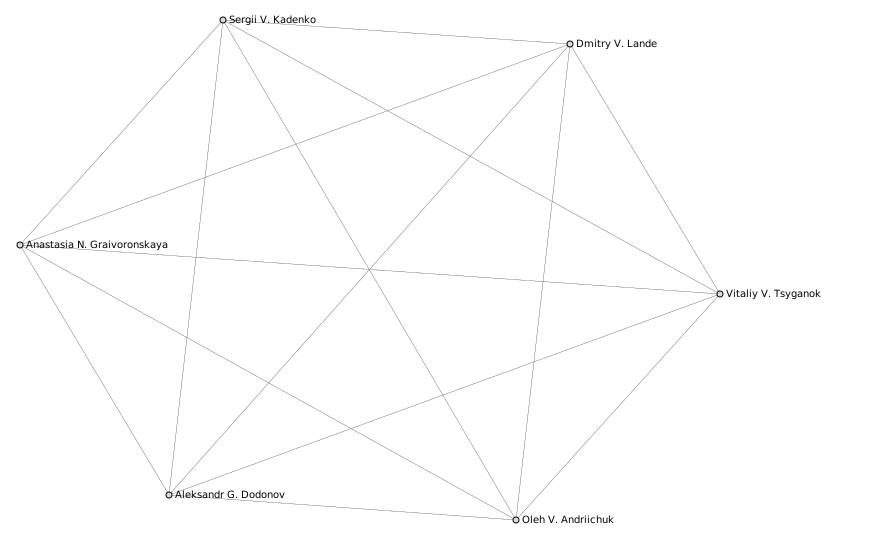

In [24]:
ego = top_nodes[4]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

In [25]:
# you can look at what articles the author was part of this way, going from networks to NLP

sorted(df[df['authors']==ego]['title'])

['Information Operations Recognition: from Nonlinear Analysis to Decision-making']

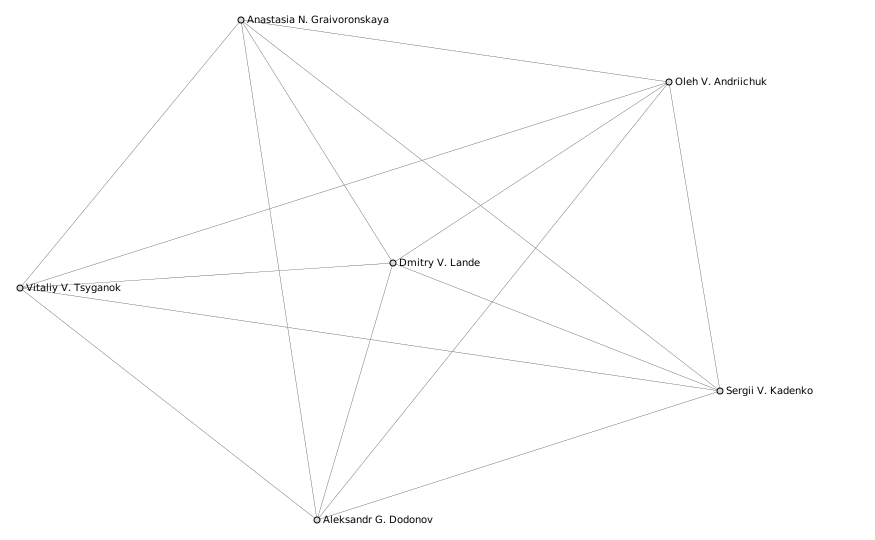

In [26]:
ego = top_nodes[5]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

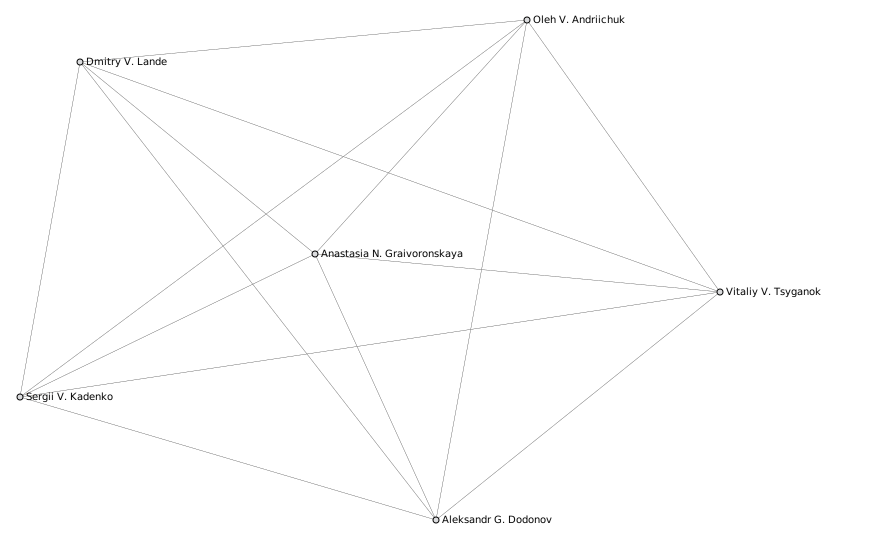

In [27]:
ego = top_nodes[6]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

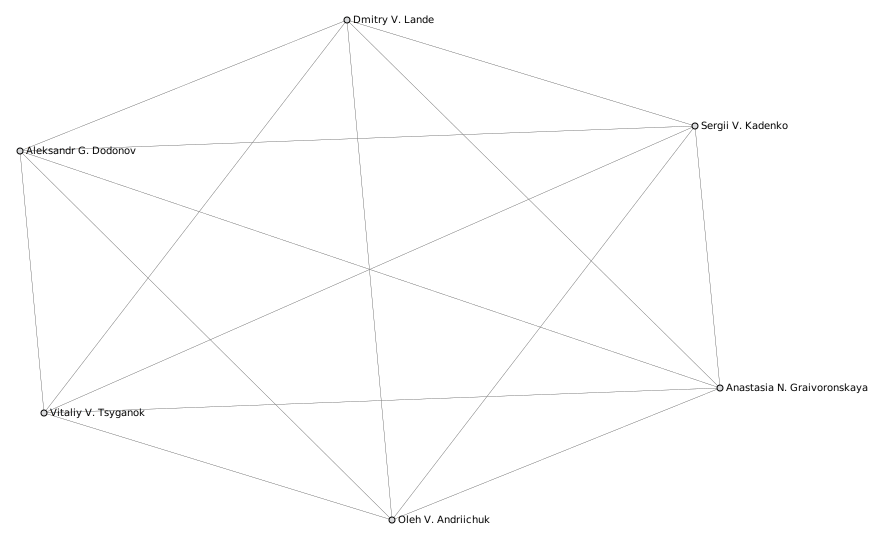

In [28]:
ego = top_nodes[7]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

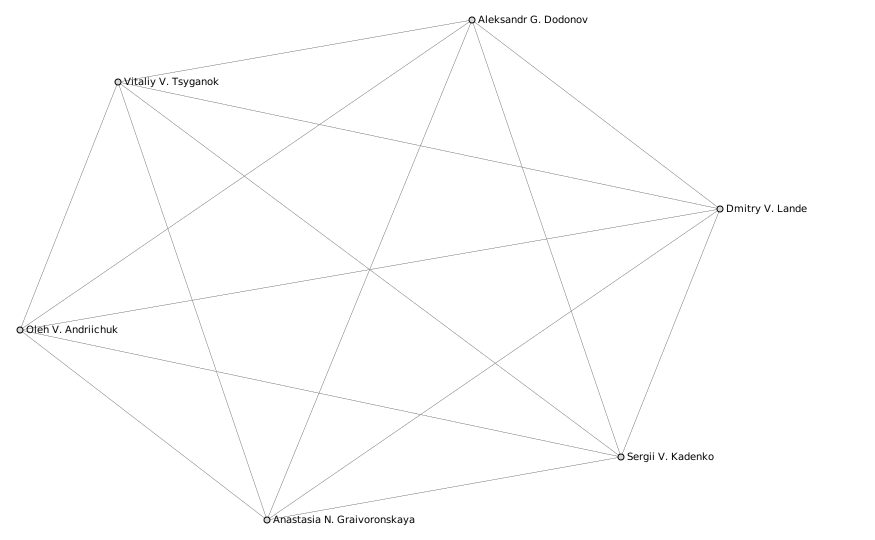

In [29]:
ego = top_nodes[8]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

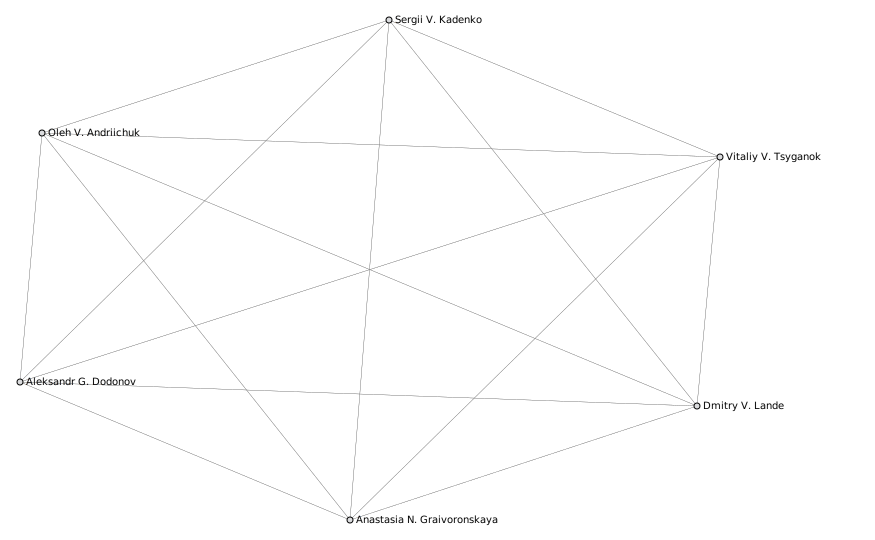

In [30]:
ego = top_nodes[9]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

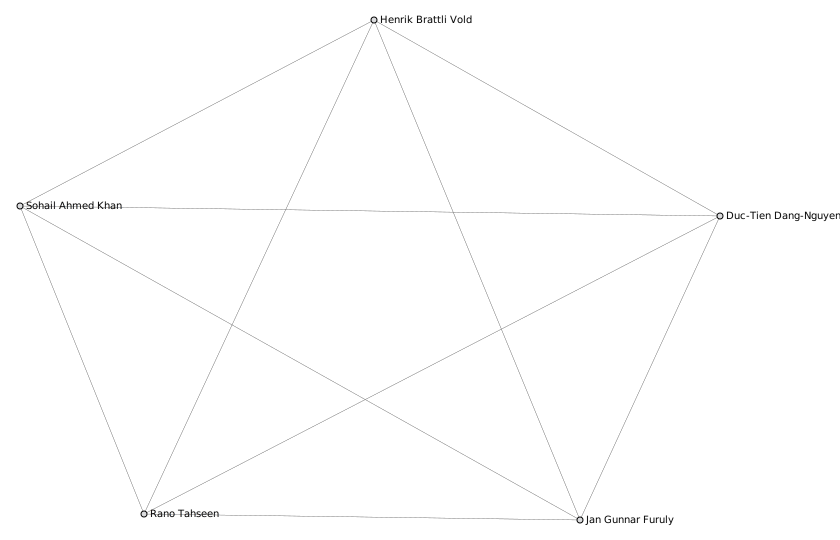

In [31]:
ego = top_nodes[10]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

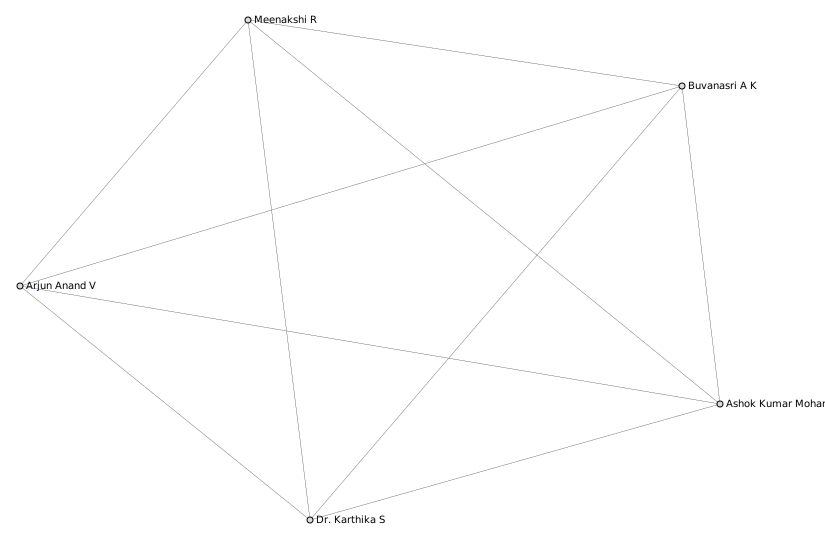

In [32]:
ego = top_nodes[11]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

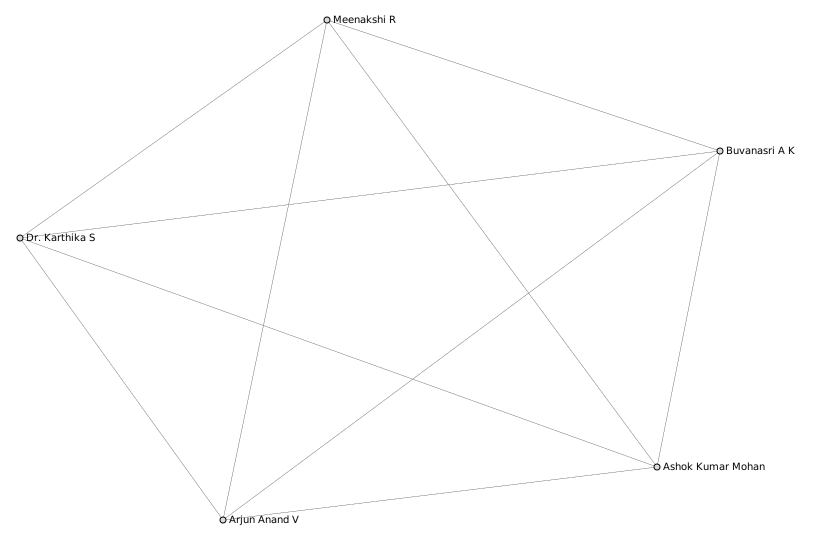

In [33]:
ego = top_nodes[12]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

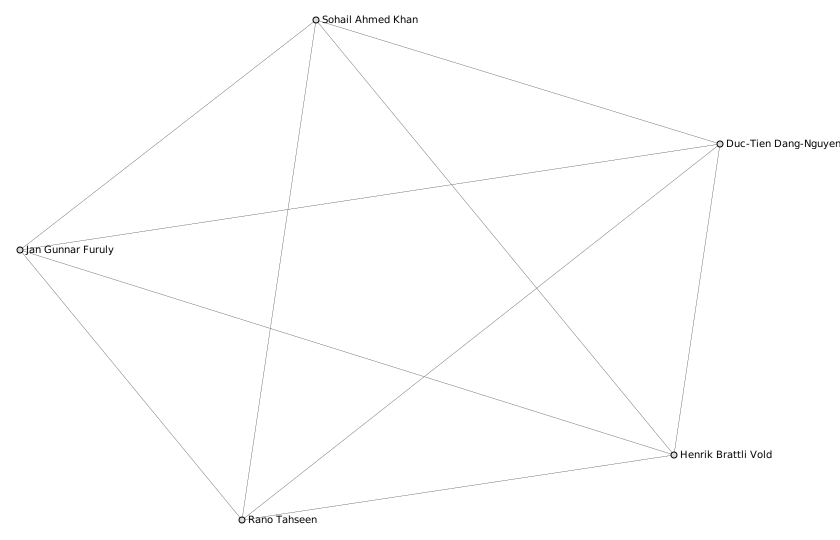

In [34]:
ego = top_nodes[13]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

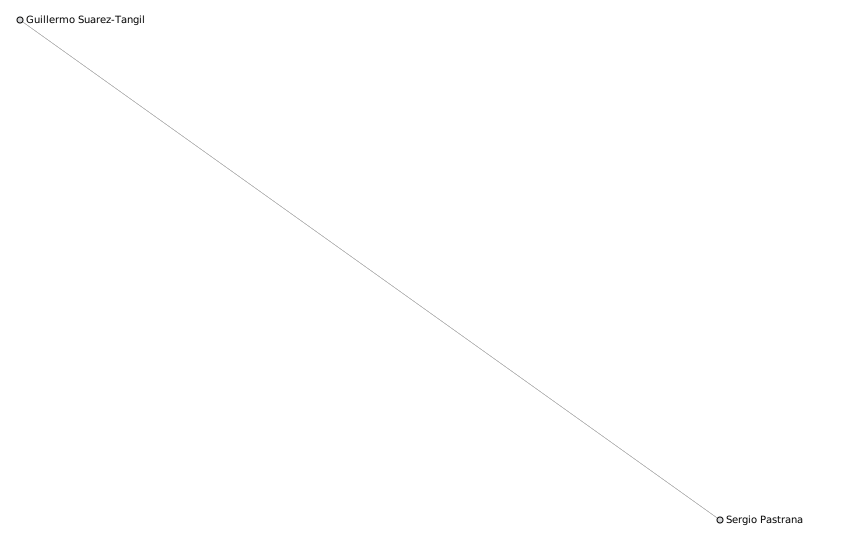

In [35]:
ego = top_nodes[14]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

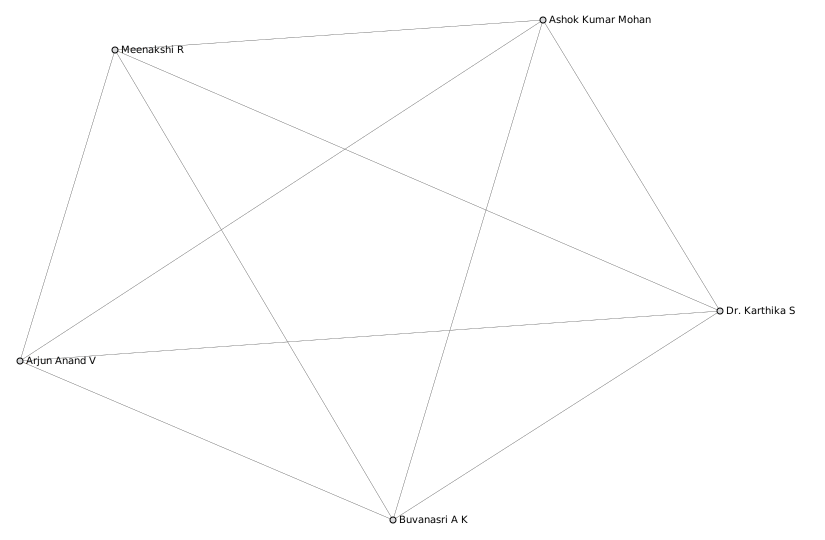

In [36]:
ego = top_nodes[15]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

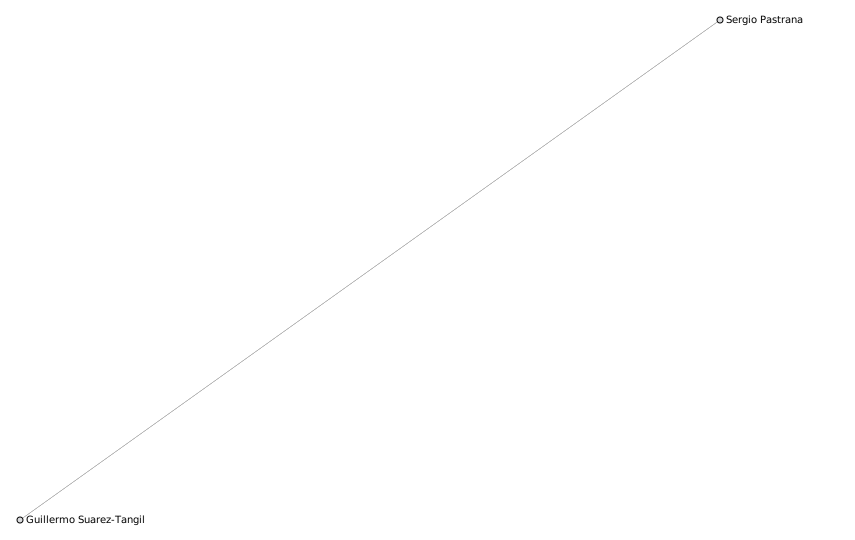

In [37]:
ego = top_nodes[16]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

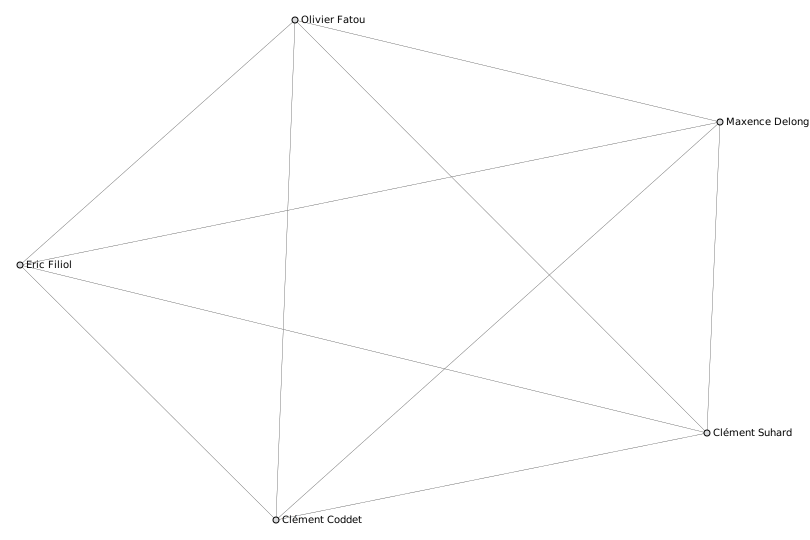

In [38]:
ego = top_nodes[17]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

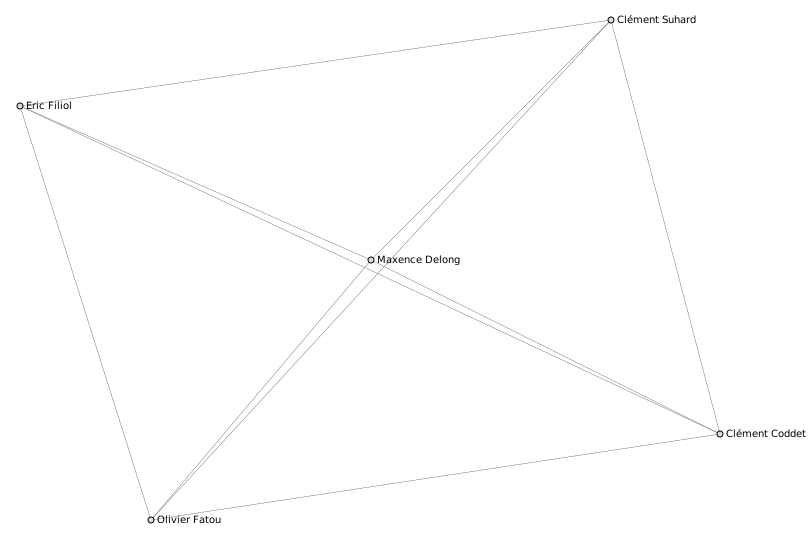

In [39]:
ego = top_nodes[18]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

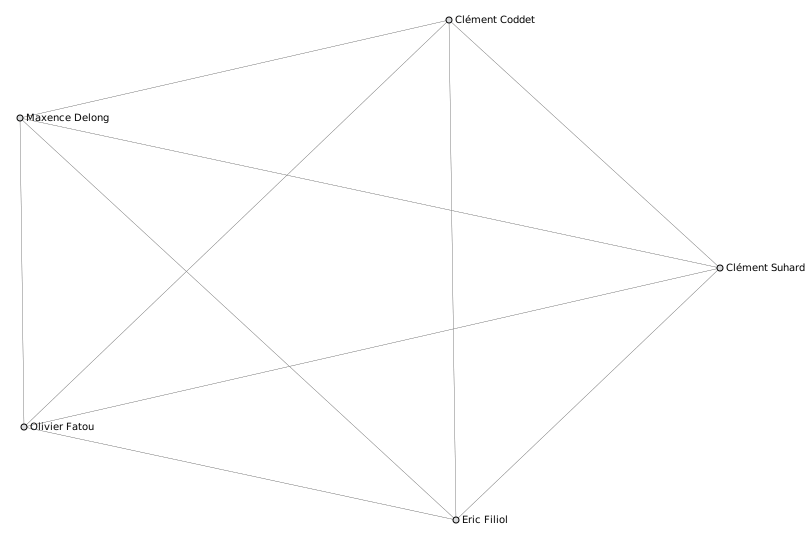

In [40]:
ego = top_nodes[19]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

# This is the Beginning

This is just the beginning of this network exploration. There are communities and connected components that should be explored. There are articles to read and authors to learn about and follow. We will certainly do more with these networks.